# TUGAS VISUALISASI WORDCLOUD

Rizki Amanullah Hakim - 
1301180522

Tugas
Buatlah visualisasi wordcloud dari kumpulan opini/komentar terkait topik spesifik tertentu berbahasa Indonesia.

Note: File yang di-submit adalah file jupyter notebook yang digunakan untuk menghasilkan visualisasi wordcloud.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import tweepy
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from PIL import Image

In [3]:
# def crawl(topik):
#     ckey = ''
#     csec = ''
#     atoken = ''
#     atokens = ''

#     auth = tweepy.OAuthHandler(ckey, csec); auth.set_access_token(atoken,atokens)
#     api = tweepy.API(auth)
#     tweets=[]
#     topik = topik + ' -filter:retweets'
#     for tweet in tweepy.Cursor(api.search, q=topik, lang="id").items(200):
#         tweets.append([tweet.text])
#     df = pd.DataFrame(tweets, columns=['Text Tweet'])
#     return df

In [4]:
# df = crawl('mudik')
# df.to_csv('topik_mudik.csv')
df = pd.read_csv('topik_mudik.csv')
df = df.drop(columns=['Unnamed: 0'],axis=0)
df.head()

,Text Tweet
0,presiden jokowi menyampaikan untuk utamakan ke...
1,Ada yang galau mikirin mudik juga tida??? 😂😂😂
2,Hai sobat Polri....\nPemerintah telah menetapk...
3,Beli tiket mudik ae lah
4,Mudik dilarang\nTempat wisata dibuka\n\nA THREAD


In [5]:
text = df['Text Tweet']
text

0      presiden jokowi menyampaikan untuk utamakan ke...
1          Ada yang galau mikirin mudik juga tida??? 😂😂😂
2      Hai sobat Polri....\nPemerintah telah menetapk...
3                                Beli tiket mudik ae lah
4       Mudik dilarang\nTempat wisata dibuka\n\nA THREAD
                             ...                        
195    Kunci utama menekan penyebaran pandemi adalah ...
196    STOP MUDIK!!!\n\nSayangi keluarga kalian dikam...
197    Dalam Surat Edaran (SE) Nomor M/7/HK.04/IV/202...
198    Tidak mudik tahun ini adalah tindakan bijak de...
199    @slsab_ nk mudik tak di bolehkan ? knp wisata ...
Name: Text Tweet, Length: 200, dtype: object

In [6]:
def clean_text(text):
    punctuations = '''!()-[]};:'{",<>./?@#$%^&*_~'''
    text = re.sub(r"http\S+", "", text)
    text = re.sub("RT",'',text); no_punct = ""
    for char in text:
        if char not in punctuations: no_punct = no_punct + char
    text = no_punct; text = text.lower()
    text = re.sub('[0-9][^\w\s]*','',text)
    text = re.sub('\n',' ',text); text = text.strip()
    new_text = ' '.join(text.split())
    stop_words = set(stopwords.words('indonesian'))
    word_token = word_tokenize(new_text)
    new_text = ' '.join([w for w in word_token if not w in stop_words])
    return new_text

In [7]:
cleaned_text = list(map(clean_text,text))
cleaned_text

['presiden jokowi utamakan keselamatan mudik kerjakeras maju negeriku',
 'galau mikirin mudik tida 😂😂😂',
 'hai sobat polri pemerintah menetapkan larangan mudik lebaran tanggal mei langkah u…',
 'beli tiket mudik ae',
 'mudik dilarang wisata dibuka a thread',
 'mudik ya kerjakeras maju negeriku',
 'wakil presiden kh maaruf amin mudik sunah menjaga covid wajib …',
 'wakil presiden kh maaruf amin mudik silaturahim sunah menjaga bahaya wa…',
 'mudik tradisi masyarakat indonesia jelang raya idul fitri sobat kamtibmas ketahui berdasark…',
 'tunda mudik tunggu pandemi bangkit',
 'hai sobat polri pemerintah menetapkan larangan mudik lebaran tanggal mei langkah u…',
 'mbro krn posisi kalimat nya beda jd artine yo beda mudik ora iso klu tanpamu dik kasihan de…',
 'mudik sunah jaga covid wajib jokowi indonesiamaju',
 'kangen keluarga mudik ya sayangi dirimu sayangi keluargamu mari bersamasama cegah penyebaran…',
 'pelarangan mudik pemerintah menjaga keselamatan masyarakat indonesia',
 'partonoadj

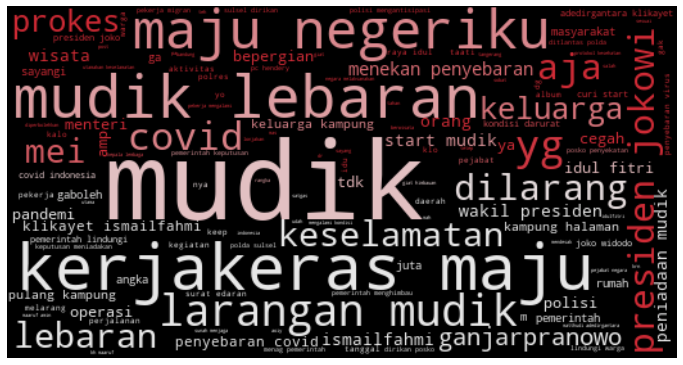

In [18]:
# Generate a word cloud image
text = " ".join(text for text in cleaned_text)
mask = np.array(Image.open("indonesia.jpg"))
wordcloud_ina = WordCloud(background_color="black", mode="RGBA", max_words=10000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_ina.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("ina_wine.png", format="png")

plt.show()